#0. Intro

Project News Hoax detection bertujuan untuk mengembangkan sistem cerdas dimana membantu memperoleh kecenderungan berita ini bernilai Hoax atau Valid dari dataset yang ada

###import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import keras
from keras.preprocessing import text,sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout

import warnings
warnings.filterwarnings('ignore')

import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Data Loading and Check Data

In [ ]:
import pandas as pd

# Ganti path sesuai dengan lokasi file CSV di Google Drive Anda
csv_path = '/content/drive/MyDrive/dataset/600news.csv'

# Baca CSV ke dalam DataFrame
df = pd.read_csv(csv_path, encoding='Windows-1254', delimiter=';')
#
# Tampilkan DataFrame
print(df)


                                                berita tagging
0    Jakarta, Di jejaring sosial, banyak beredar in...   Valid
1    Isu bahwa ikan lele mengandung sel kanker di j...   Valid
2    Bagi penikmat kuliner dengan bahan dasar ikan ...   Valid
3    Ikan lele merupakan salah satu makanan favorit...   Valid
4    Ikan lele merupakan bahan makanan yang cukup p...   Valid
..                                                 ...     ...
595  Kabar yang beredar seputar rencana kenaikan ga...   Valid
596  Kabar yang beredar seputar rencana kenaikan ga...   Valid
597  Akhir-akhir ini, beredar pemberitaan yang meny...   Valid
598  Rancangan peraturan pemerintah (RPP) tentang G...   Valid
599  Kabar yang beredar seputar rencana kenaikan ga...   Valid

[600 rows x 2 columns]


In [ ]:
df.head()

,berita,tagging
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid
3,Ikan lele merupakan salah satu makanan favorit...,Valid
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid


Merubah agar menjadi numerik taggingnya

0 = Valid
1 = Hoax

In [ ]:
# Menggunakan replace untuk mengganti nilai
df['tagging'] = df['tagging'].replace({'Valid': 0, 'Hoax': 1})

# Tampilkan DataFrame setelah penggantian
print(df)


                                                berita  tagging
0    Jakarta, Di jejaring sosial, banyak beredar in...        0
1    Isu bahwa ikan lele mengandung sel kanker di j...        0
2    Bagi penikmat kuliner dengan bahan dasar ikan ...        0
3    Ikan lele merupakan salah satu makanan favorit...        0
4    Ikan lele merupakan bahan makanan yang cukup p...        0
..                                                 ...      ...
595  Kabar yang beredar seputar rencana kenaikan ga...        0
596  Kabar yang beredar seputar rencana kenaikan ga...        0
597  Akhir-akhir ini, beredar pemberitaan yang meny...        0
598  Rancangan peraturan pemerintah (RPP) tentang G...        0
599  Kabar yang beredar seputar rencana kenaikan ga...        0

[600 rows x 2 columns]


In [ ]:
df.tail()

,berita,tagging
595,Kabar yang beredar seputar rencana kenaikan ga...,0
596,Kabar yang beredar seputar rencana kenaikan ga...,0
597,"Akhir-akhir ini, beredar pemberitaan yang meny...",0
598,Rancangan peraturan pemerintah (RPP) tentang G...,0
599,Kabar yang beredar seputar rencana kenaikan ga...,0


cek Null

In [ ]:
df.isnull().sum()

berita     0
tagging    0
dtype: int64

#2. Visualization

##2.1 Count Fake and Real Data

0    372
1    228
Name: tagging, dtype: int64


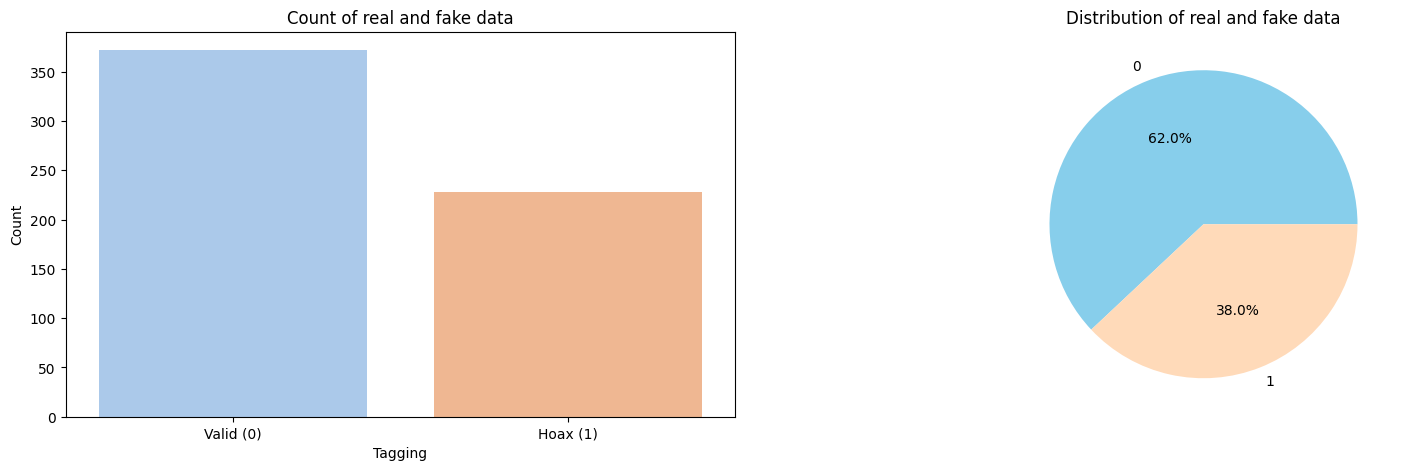

In [ ]:
#menghitung jumlah valid dan hoax
df['tagging'] = df['tagging'].astype(int)
print(df["tagging"].value_counts())

# Menghitung jumlah masing-masing nilai
counts = df['tagging'].value_counts()

# Membuat subplots
fig, ax = plt.subplots(1, 2, figsize=(19, 5))

# Count plot
g1 = sns.barplot(x=counts.index, y=counts.values, palette="pastel", ax=ax[0])
g1.set_title("Count of real and fake data")
g1.set_ylabel("Count")
g1.set_xlabel("Tagging")
g1.set_xticks([0, 1])
g1.set_xticklabels(['Valid (0)', 'Hoax (1)'])
g1.set_xlim(-0.5, 1.5)


#piechart
g2 = ax[1].pie(df["tagging"].value_counts(), explode=[0, 0], labels=df["tagging"].value_counts().index, autopct='%1.1f%%', colors=['SkyBlue', 'PeachPuff'])
ax[1].set_title("Distribution of real and fake data")

plt.show()

#3. Data Cleaning

##3.1 Removal of HTML Content

In [ ]:
pip install bs4

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=8b4d9dae42d90fd48145599cdd0581f0a67448b0dc6e81853c80a9492d6ff254
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [ ]:
from bs4 import BeautifulSoup

def remove_html_tags(html):
    soup = BeautifulSoup(html, 'html.parser')
    return soup.get_text()

df['berita'] = df['berita'].apply(remove_html_tags)
print(df)

                                                berita  tagging
0    Jakarta, Di jejaring sosial, banyak beredar in...        0
1    Isu bahwa ikan lele mengandung sel kanker di j...        0
2    Bagi penikmat kuliner dengan bahan dasar ikan ...        0
3    Ikan lele merupakan salah satu makanan favorit...        0
4    Ikan lele merupakan bahan makanan yang cukup p...        0
..                                                 ...      ...
595  Kabar yang beredar seputar rencana kenaikan ga...        0
596  Kabar yang beredar seputar rencana kenaikan ga...        0
597  Akhir-akhir ini, beredar pemberitaan yang meny...        0
598  Rancangan peraturan pemerintah (RPP) tentang G...        0
599  Kabar yang beredar seputar rencana kenaikan ga...        0

[600 rows x 2 columns]


## 3.2 Removal of Punctuation Marks and Special Characters

In [ ]:
def remove_punctuation(text):
    # Mengganti tanda baca dengan spasi
    text_no_punct = re.sub(r'[^\w\s]', ' ', text)
    return text_no_punct

df['berita'] = df['berita'].apply(remove_punctuation)

print(df)

                                                berita  tagging
0    Jakarta  Di jejaring sosial  banyak beredar in...        0
1    Isu bahwa ikan lele mengandung sel kanker di j...        0
2    Bagi penikmat kuliner dengan bahan dasar ikan ...        0
3    Ikan lele merupakan salah satu makanan favorit...        0
4    Ikan lele merupakan bahan makanan yang cukup p...        0
..                                                 ...      ...
595  Kabar yang beredar seputar rencana kenaikan ga...        0
596  Kabar yang beredar seputar rencana kenaikan ga...        0
597  Akhir akhir ini  beredar pemberitaan yang meny...        0
598  Rancangan peraturan pemerintah  RPP  tentang G...        0
599  Kabar yang beredar seputar rencana kenaikan ga...        0

[600 rows x 2 columns]


## 3.3 Removal of Stopwords

In [ ]:
pip install Sastrawi


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
# Membuat objek StopWordRemover
stopword_factory = StopWordRemoverFactory()
stopword_remover = stopword_factory.create_stop_word_remover()

# Fungsi untuk menghapus stopwords dari satu teks
def remove_stopwords(text):
    return stopword_remover.remove(text)

# Menerapkan fungsi ke setiap sel dalam kolom 'text_content'
df['berita'] = df['berita'].apply(remove_stopwords)

# Menampilkan hasil
print(df)

                                                berita  tagging
0    Jakarta  Di jejaring sosial  banyak beredar in...        0
1    Isu ikan lele mengandung sel kanker jejaring s...        0
2    Bagi penikmat kuliner bahan dasar ikan lele  b...        0
3    Ikan lele merupakan salah satu makanan favorit...        0
4    Ikan lele merupakan bahan makanan cukup popule...        0
..                                                 ...      ...
595  Kabar beredar seputar rencana kenaikan gaji Pr...        0
596  Kabar beredar seputar rencana kenaikan gaji Pr...        0
597  Akhir akhir  beredar pemberitaan menyatakan ad...        0
598  Rancangan peraturan pemerintah  RPP  Gaji Tunj...        0
599  Kabar beredar seputar rencana kenaikan gaji Pr...        0

[600 rows x 2 columns]


In [ ]:
import pandas as pd
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Daftar stopwords kustom
custom_stopwords = ['satu','benar','6','sebut', 'jadi', 'kata', 'sedang', 'sebut', 'jelas', 'beberapa', 'bukan', 'jangan','ter','banyak','bahkan','baik']

# Membuat objek StopWordRemover dari Sastrawi
stopword_factory = StopWordRemoverFactory()
stopword_remover = stopword_factory.create_stop_word_remover()

# Fungsi untuk menghapus stopwords dari teks
def remove_stopwords(text):
    # Menghapus stopwords
    cleaned_text = stopword_remover.remove(text)
    return cleaned_text

# Fungsi untuk menghapus stopwords kustom dari teks
def remove_custom_stopwords(text):
    # Menghapus stopwords kustom
    for word in custom_stopwords:
        text = text.replace(word, '')
    return text

# Menerapkan fungsi ke setiap sel dalam kolom 'text_content'
df['berita'] = df['berita'].apply(remove_stopwords)
df['berita'] = df['berita'].apply(remove_custom_stopwords)

# Menampilkan hasil
print(df)

                                                berita  tagging
0    Jakarta  Di jejaring sosial   beredar informas...        0
1    Isu ikan lele mengandung sel kanker jejaring s...        0
2    Bagi penikmat kuliner bahan dasar ikan lele  b...        0
3    Ikan lele merupakan salah  makanan favorit Ind...        0
4    Ikan lele merupakan bahan makanan cukup popule...        0
..                                                 ...      ...
595  Kabar beredar seputar rencana kenaikan gaji Pr...        0
596  Kabar beredar seputar rencana kenaikan gaji Pr...        0
597  Akhir akhir  beredar pemberitaan menyatakan ke...        0
598  Rancangan peraturan pemerintah  RPP  Gaji Tun ...        0
599  Kabar beredar seputar rencana kenaikan gaji Pr...        0

[600 rows x 2 columns]


## 3.4 Lemmatization

In [ ]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


In [ ]:
# Membuat objek Stemmer dan StopWordRemover dari Sastrawi
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

stopword_factory = StopWordRemoverFactory()
stopword_remover = stopword_factory.create_stop_word_remover()

# Fungsi untuk lemmatisasi
def lemmatize(text):
    # Stemming
    stemmed_text = stemmer.stem(text)
    # Menghapus stopwords
    lemmatized_text = stopword_remover.remove(stemmed_text)
    return lemmatized_text

In [ ]:
# Menerapkan fungsi lemmatisasi ke setiap sel dalam kolom 'text_content'
df['berita'] = df['berita'].apply(lemmatize)

# Menampilkan hasil
print(df)

                                                berita  tagging
0    jakarta jejaring sosial edar informasi sebut l...        0
1    isu ikan lele kandung sel kanker jejaring soci...        0
2    nikmat kuliner bahan dasar ikan lele berita su...        0
3    ikan lele rupa salah makan favorit indonesia h...        0
4    ikan lele rupa bahan makan cukup populer indon...        0
..                                                 ...      ...
595  kabar edar putar rencana naik gaji presiden wa...        0
596  kabar edar putar rencana naik gaji presiden wa...        0
597  akhir akhir edar berita nyata naik gaji presid...        0
598  rancang atur perintah rpp gaji tun pegawai neg...        0
599  kabar edar putar rencana naik gaji presiden wa...        0

[600 rows x 2 columns]


## 3.5 Visualization with clean data

## 3.5.1 WordCloud for News

Ranking kata

In [ ]:
import pandas as pd
from collections import Counter
import re

# 1. Menggabungkan Teks dari Seluruh Kolom
all_text = ' '.join(df['berita'])

# 2. Tokenisasi dan Pembersihan Teks
tokens = re.findall(r'\b\w+\b', all_text.lower())  # Tokenisasi dan konversi ke lowercase

# 3. Menghitung Frekuensi Kemunculan Kata
word_counts = Counter(tokens)

# 4. Membuat DataFrame untuk Rangking Kata
word_ranking_df = pd.DataFrame(word_counts.items(), columns=['Kata', 'Frekuensi'])
word_ranking_df = word_ranking_df.sort_values(by='Frekuensi', ascending=False).reset_index(drop=True)

# Menampilkan hanya 1-20 kata terbanyak
top_20_words = word_ranking_df.head(20)
print(top_20_words)

         Kata  Frekuensi
0        lele       1082
1        ikan       1005
2        laku        824
3   indonesia        658
4     pokemon        645
5        bulu        643
6       orang        634
7    facebook        621
8       sikat        607
9        babi        583
10    kandung        551
11   presiden        524
12      media        523
13     stroke        522
14      bakar        511
15     iphone        508
16       edar        497
17     permen        475
18      salah        469
19       aksi        448


wordcloud hoax

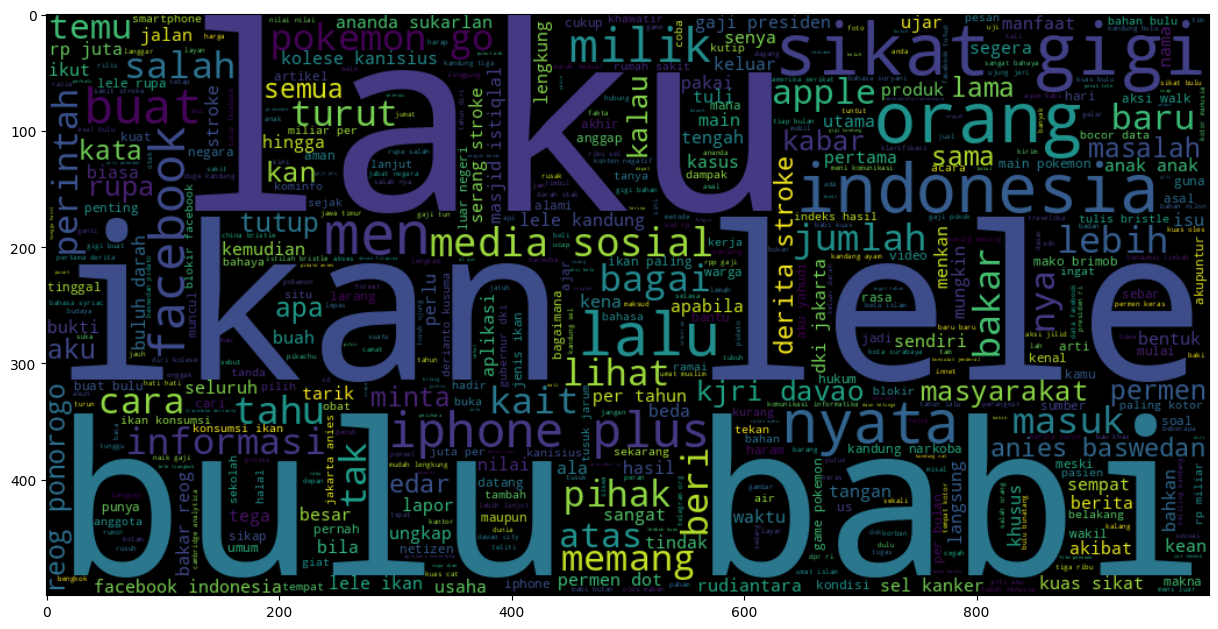

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(df[df.tagging == 1].berita))
plt.imshow(wc , interpolation = 'bilinear')

Rangking untuk Hoax

In [ ]:
# Pilih hanya baris dengan tagging = 1
filtered_df = df[df['tagging'] == 1]

# 1. Menggabungkan Teks dari Seluruh Kolom
all_text = ' '.join(filtered_df['berita'])

# 2. Tokenisasi dan Pembersihan Teks
tokens = re.findall(r'\b\w+\b', all_text.lower())  # Tokenisasi dan konversi ke lowercase

# 3. Menghitung Frekuensi Kemunculan Kata
word_counts = Counter(tokens)

# 4. Membuat DataFrame untuk Rangking Kata
word_ranking_df = pd.DataFrame(word_counts.items(), columns=['Kata', 'Frekuensi'])
word_ranking_df = word_ranking_df.sort_values(by='Frekuensi', ascending=False).reset_index(drop=True)

# Menampilkan hasil
top_20_words = word_ranking_df.head(20)
print(top_20_words)

         Kata  Frekuensi
0        ikan        488
1        lele        482
2        babi        338
3        bulu        332
4   indonesia        308
5       sikat        307
6        laku        301
7    facebook        281
8       orang        281
9     kandung        260
10    pokemon        255
11      bakar        242
12      lebih        232
13     stroke        232
14     iphone        216
15       gigi        215
16       kuas        212
17       gaji        207
18       aksi        194
19      bahan        189


wordcloud valid

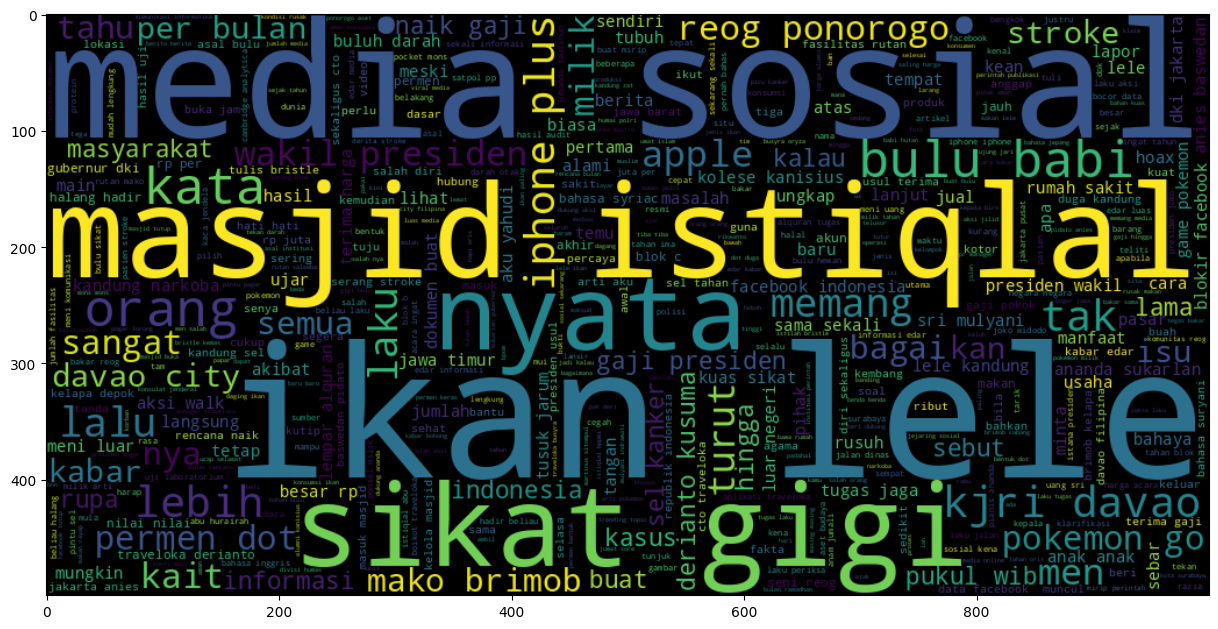

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(df[df.tagging == 0].berita))
plt.imshow(wc , interpolation = 'bilinear')

Rangking untuk valid

In [ ]:
# Pilih hanya baris dengan tagging = 0
filtered_df = df[df['tagging'] == 0]

# 1. Menggabungkan Teks dari Seluruh Kolom
all_text = ' '.join(filtered_df['berita'])

# 2. Tokenisasi dan Pembersihan Teks
tokens = re.findall(r'\b\w+\b', all_text.lower())  # Tokenisasi dan konversi ke lowercase

# 3. Menghitung Frekuensi Kemunculan Kata
word_counts = Counter(tokens)

# 4. Membuat DataFrame untuk Rangking Kata
word_ranking_df = pd.DataFrame(word_counts.items(), columns=['Kata', 'Frekuensi'])
word_ranking_df = word_ranking_df.sort_values(by='Frekuensi', ascending=False).reset_index(drop=True)

# Menampilkan hasil
top_20_words = word_ranking_df.head(20)
print(top_20_words)

         Kata  Frekuensi
0        lele        600
1        laku        523
2        ikan        517
3     pokemon        390
4        edar        377
5       media        364
6      masjid        361
7       orang        353
8   indonesia        350
9    facebook        340
10   presiden        337
11      tahan        322
12       bulu        311
13     permen        301
14      sikat        300
15     sosial        296
16     iphone        292
17    kandung        291
18  informasi        291
19     stroke        290


##3.5.2 N-Gram Analysis


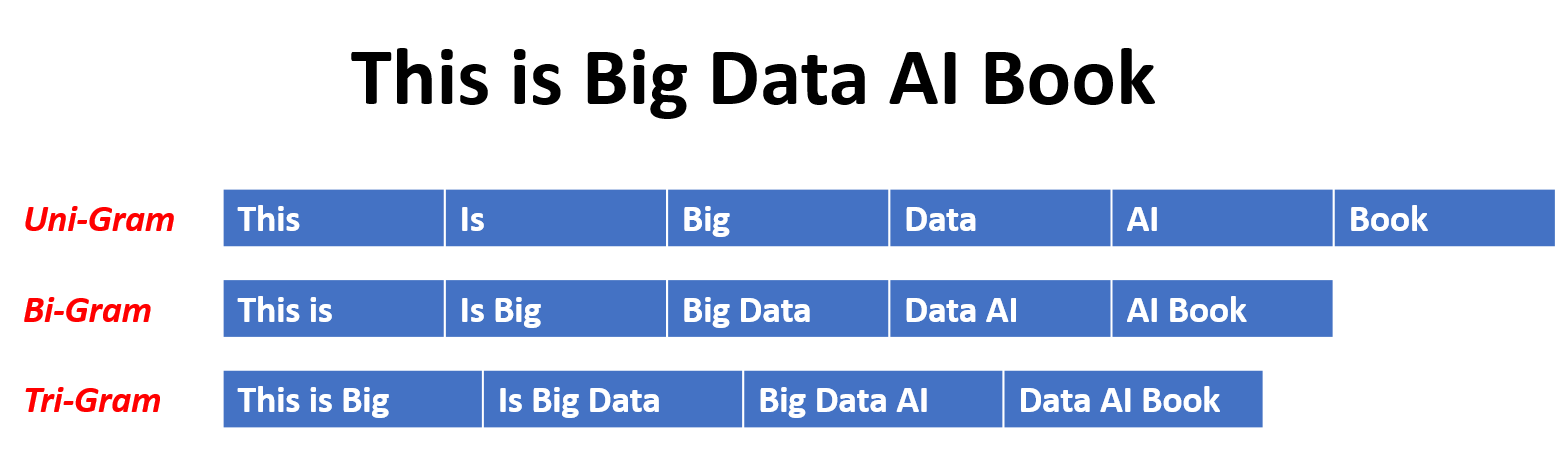

In [ ]:
texts = ' '.join(df['berita'])

In [ ]:
string = texts.split(" ")

In [ ]:
def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))
    return sns.barplot(x='count',y='word', data=n_gram_df)

           word  count
0       (lele,)   1082
1       (ikan,)   1005
2       (laku,)    824
3  (indonesia,)    658
4    (pokemon,)    645


<Axes: xlabel='count', ylabel='word'>

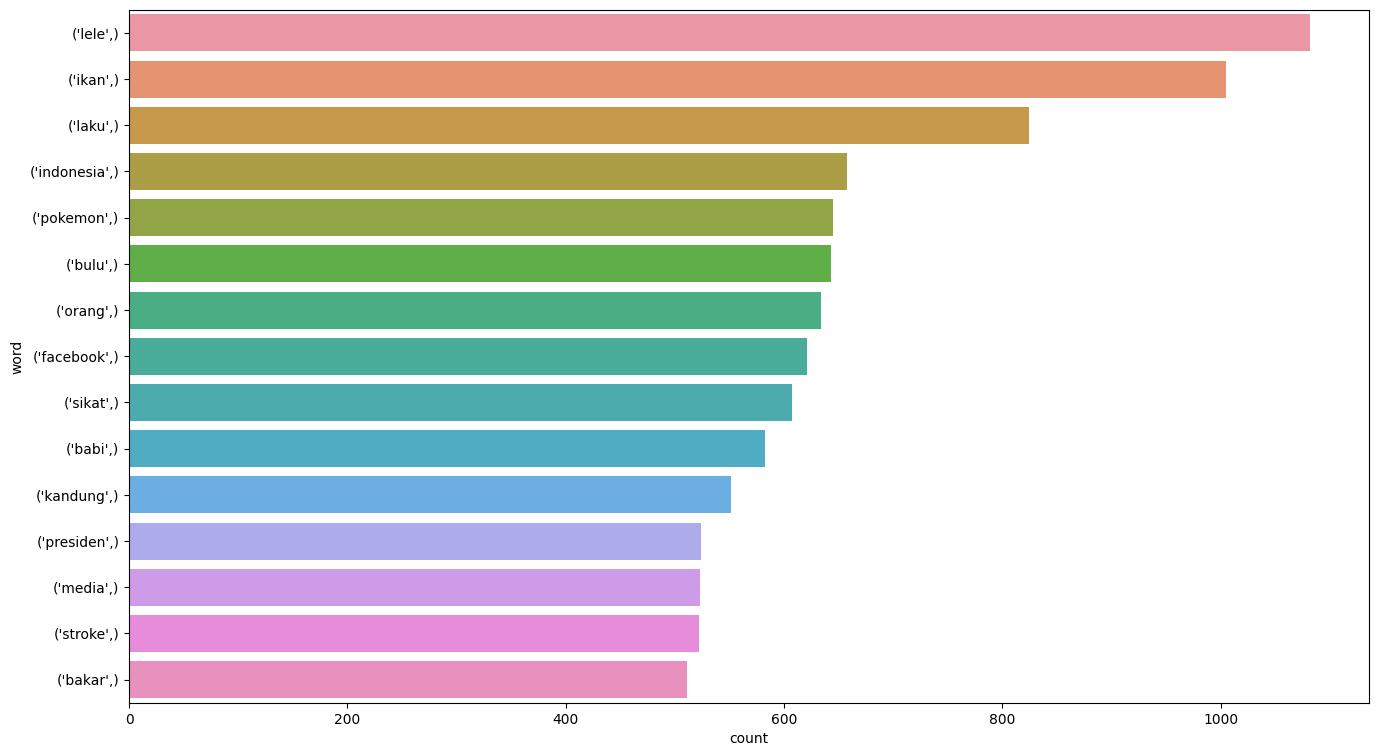

In [ ]:
draw_n_gram(string,1)

              word  count
0     (ikan, lele)    542
1     (bulu, babi)    408
2    (sikat, gigi)    401
3  (media, sosial)    367
4   (iphone, plus)    263


<Axes: xlabel='count', ylabel='word'>

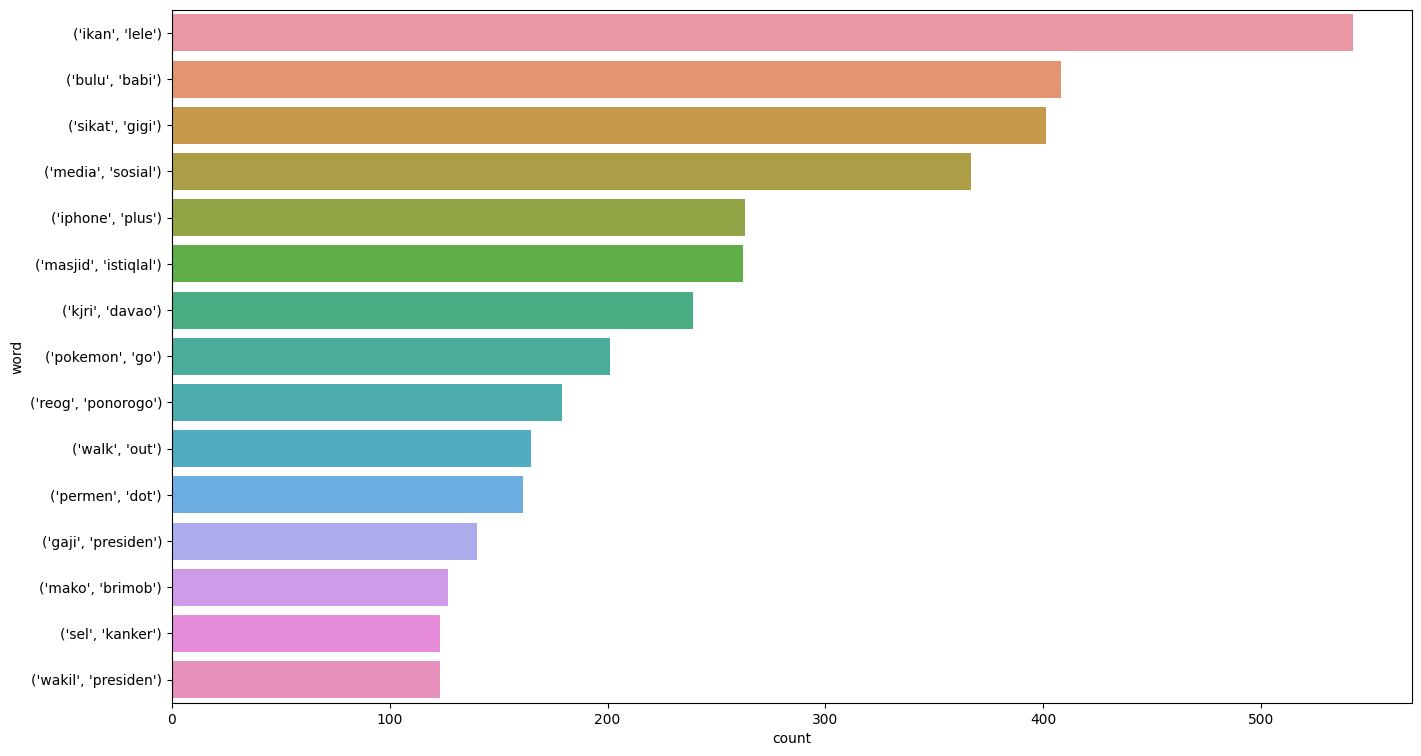

In [ ]:
draw_n_gram(string,2)

                          word  count
0            (aksi, walk, out)    104
1        (ikan, lele, kandung)     92
2          (kjri, davao, city)     76
3         (meni, luar, negeri)     69
4  (presiden, wakil, presiden)     68


<Axes: xlabel='count', ylabel='word'>

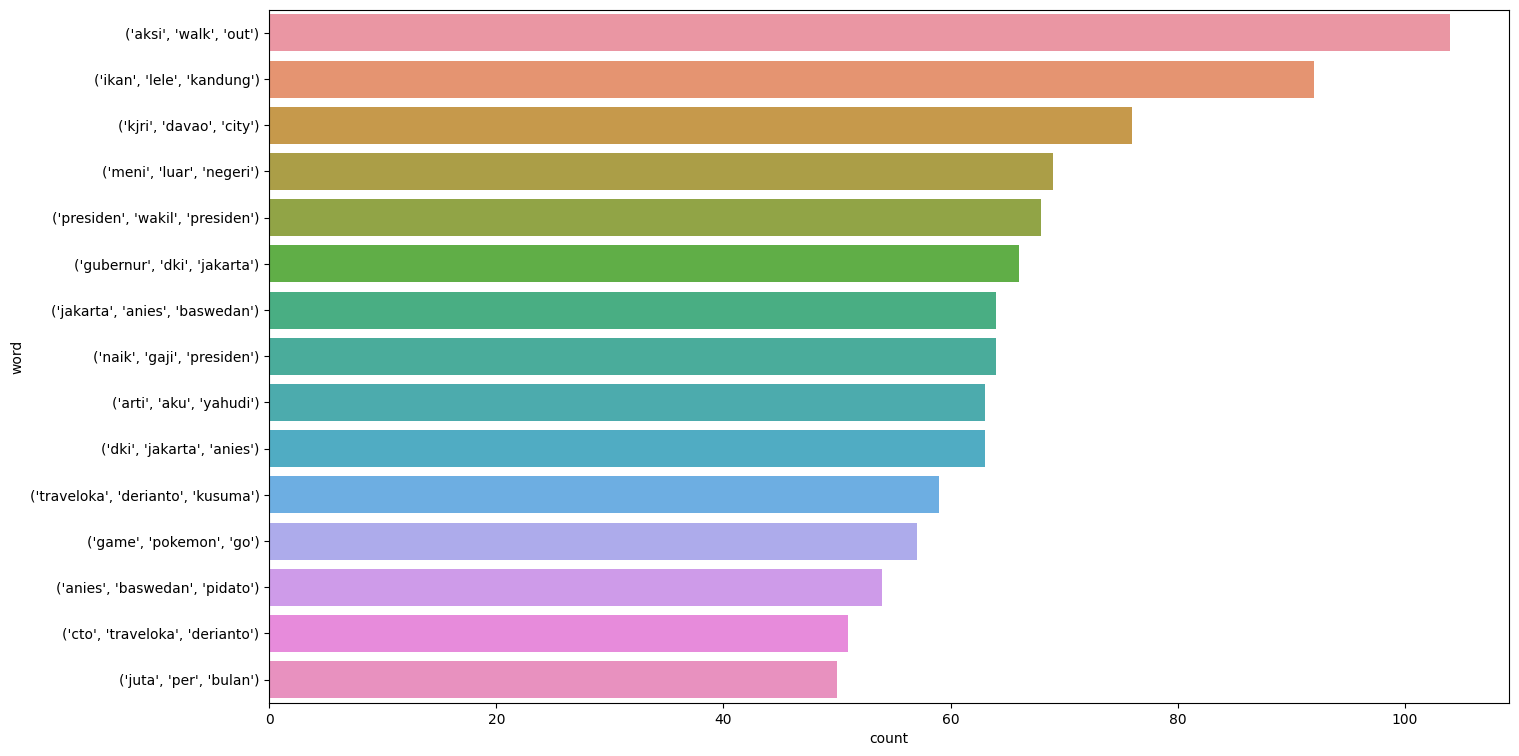

In [ ]:
draw_n_gram(string,3)

#4. Modelling

#4.1 Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['berita'], df['tagging'], random_state=0)

#4.2 Tokenizing

Tokenizing Text -> Repsesenting each word by a number

Mapping of orginal word to number is preserved in word_index property of tokenizer

In [ ]:
max_features = 10000
maxlen = 300

In [ ]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [ ]:
tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

#4.3 Trainig LSTM Model

In [ ]:
batch_size = 256
epochs = 10
embed_size = 100

testing 1

In [ ]:
#model = Sequential()
#Non-trainable embeddidng layer
#model.add(Embedding(max_features, output_dim=embed_size, input_length=maxlen, trainable=False))
#LSTM
#model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
#model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
#model.add(Dense(units = 32 , activation = 'relu'))
#model.add(Dense(1, activation='sigmoid'))
#model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

testing 2

In [ ]:
from keras.regularizers import l2


In [ ]:
#model = Sequential()
#model.add(Embedding(max_features, output_dim=embed_size, input_length=maxlen, trainable=True))  # Mengubah trainable menjadi True
#model.add(LSTM(units=128, return_sequences=True, recurrent_dropout=0.25, dropout=0.25))
#model.add(LSTM(units=64, recurrent_dropout=0.1, dropout=0.1))
#model.add(Dense(units=32, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
#model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])  # Mengubah lr menjadi 0.001


In [ ]:
model = Sequential()
model.add(Embedding(max_features, output_dim=embed_size, input_length=maxlen, trainable=True))
model.add(LSTM(units=128, return_sequences=True, recurrent_dropout=0.25, dropout=0.50))
model.add(LSTM(units=64, recurrent_dropout=0.1, dropout=0.1))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=2, activation='softmax'))  # Output layer with 2 units for binary classification
model.compile(optimizer=keras.optimizers.Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)
# Changed loss to categorical_crossentropy

//note

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 300, 128)          117248    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1168802 (4.46 MB)
Trainable params: 1168802 (4.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()


In [ ]:
from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, num_classes=2)
y_test_one_hot = to_categorical(y_test, num_classes=2)


In [ ]:
history = model.fit(X_train, y_train_one_hot, validation_split=0.2, epochs=10, batch_size=batch_size, shuffle=True, verbose=1)

Epoch 1/10
2/2 [==============================] - 32s 16s/step - loss: 0.6917 - accuracy: 0.5722 - val_loss: 0.6883 - val_accuracy: 0.5778
Epoch 2/10
2/2 [==============================] - 31s 16s/step - loss: 0.6832 - accuracy: 0.6278 - val_loss: 0.6823 - val_accuracy: 0.5778
Epoch 3/10
2/2 [==============================] - 36s 20s/step - loss: 0.6687 - accuracy: 0.6278 - val_loss: 0.6763 - val_accuracy: 0.5778
Epoch 4/10
2/2 [==============================] - 34s 17s/step - loss: 0.6468 - accuracy: 0.6278 - val_loss: 0.6946 - val_accuracy: 0.5778
Epoch 5/10
2/2 [==============================] - 33s 18s/step - loss: 0.6289 - accuracy: 0.6278 - val_loss: 0.7068 - val_accuracy: 0.5778
Epoch 6/10
2/2 [==============================] - 33s 17s/step - loss: 0.6092 - accuracy: 0.6278 - val_loss: 0.6780 - val_accuracy: 0.5778
Epoch 7/10
2/2 [==============================] - 34s 17s/step - loss: 0.5665 - accuracy: 0.6306 - val_loss: 0.6579 - val_accuracy: 0.5889
Epoch 8/10
2/2 [===========

#5. Analysist After Testing

In [ ]:
print("Accuracy of the model on Training Data is - ", model.evaluate(X_train, y_train_one_hot)[1]*100, "%")
print("Accuracy of the model on Testing Data is - ", model.evaluate(X_test, y_test_one_hot)[1]*100, "%")

15/15 [==============================] - 60s 4s/step - loss: 0.3478 - accuracy: 0.8756
Accuracy of the model on Training Data is -  87.55555748939514 %
5/5 [==============================] - 21s 4s/step - loss: 0.5826 - accuracy: 0.6933
Accuracy of the model on Testing Data is -  69.33333277702332 %


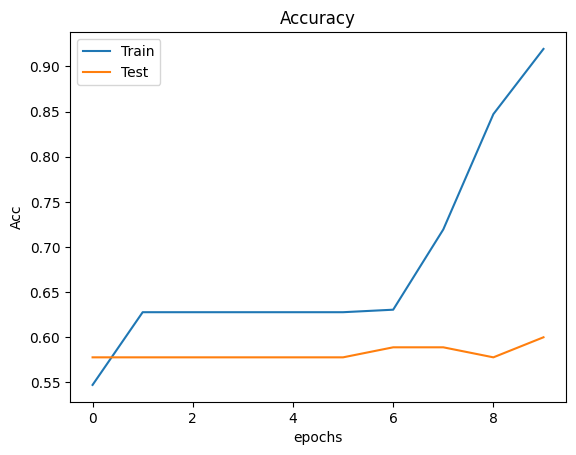

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

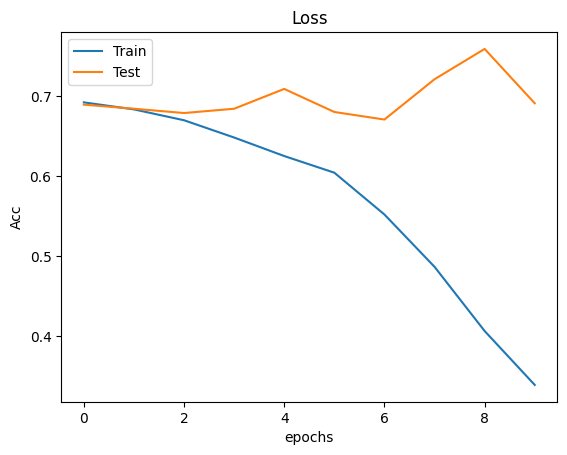

In [ ]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung confusion matrix
cm = confusion_matrix(X_train, y_train_one_hot)

# Membuat heatmap dari confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])

plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Mendapatkan probabilitas prediksi untuk set data uji
pred_probabilities = model.predict(X_test)

# Menggunakan threshold 0.5 untuk mendapatkan kelas prediksi
pred_classes = (pred_probabilities > 0.5).astype('int')

# Menampilkan laporan klasifikasi
print(classification_report(y_test, pred_classes, target_names=['0', '1']))
